# Data integration and exploring

In [1]:
import pandas as pd
import numpy as np

dayahead = pd.read_parquet('processed_data/dayahead.parquet')
helen = pd.read_parquet('processed_data/helen.parquet')
tuulivoima = pd.read_parquet('processed_data/tuulivoima.parquet')
weather = pd.read_parquet('processed_data/weather.parquet')

In [2]:
data = weather.join(helen).join(tuulivoima).join(dayahead)
data = data.drop(columns=['time','clouds', 'time zone', 'rain intensitety'])
data.head()

,year,month,day,pressure,rain,humidity,temperature,wind,hour,dh_MWh,Wind_MWh,price
datetime,,,,,,,,,,,,
2019-01-01 00:00:00,2019,1,1,1000.9,0.9,97.0,0.8,7.9,0,1063.619950,1427.0,10.07
2019-01-01 01:00:00,2019,1,1,998.7,2.2,97.0,1.5,8.5,1,1052.205482,1352.0,10.03
2019-01-01 02:00:00,2019,1,1,996.6,1.7,98.0,2.0,9.8,2,1014.848148,1177.0,4.56
2019-01-01 03:00:00,2019,1,1,994.2,0.3,98.0,2.4,8.9,3,1009.665530,1001.0,4.83
2019-01-01 04:00:00,2019,1,1,992.0,0.4,98.0,2.5,7.6,4,1028.339021,826.0,8.09


In [3]:
data.dtypes

year             int64
month            int64
day              int64
pressure       float64
rain           float64
humidity       float64
temperature    float64
wind           float64
hour             int64
dh_MWh         float64
Wind_MWh       float64
price          float64
dtype: object

Let's add weekday number to the data to be able to see the weekly variation

In [4]:
data['weekday'] = data.index.day_of_week

# Weather and district heating

<AxesSubplot:title={'center':'Heating'}, xlabel='datetime'>

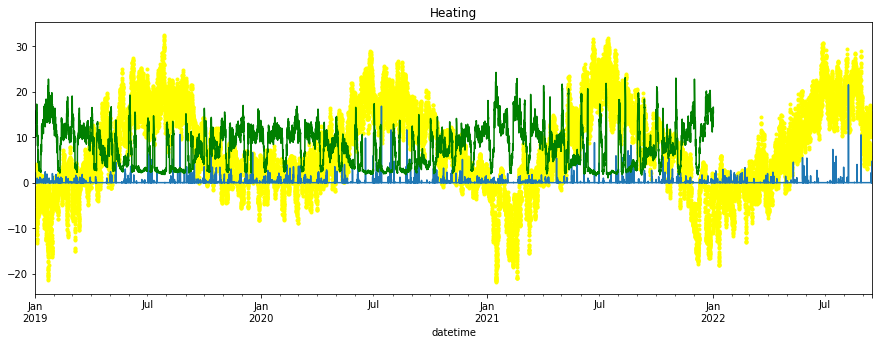

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

data.loc[:,'temperature'].plot(ax=ax, style='.', color='yellow', figsize=(15,5), title='Temperature')
data.loc[:,'rain'].plot(ax=ax, style='-', figsize=(15,5), title='Temperature')
data.loc[:,'dh_MWh'].apply(lambda p: p * 0.01).plot(ax=ax, style='-', color='green', figsize=(15,5), title='Heating')


# Short time look up - Wind power and electricity price

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

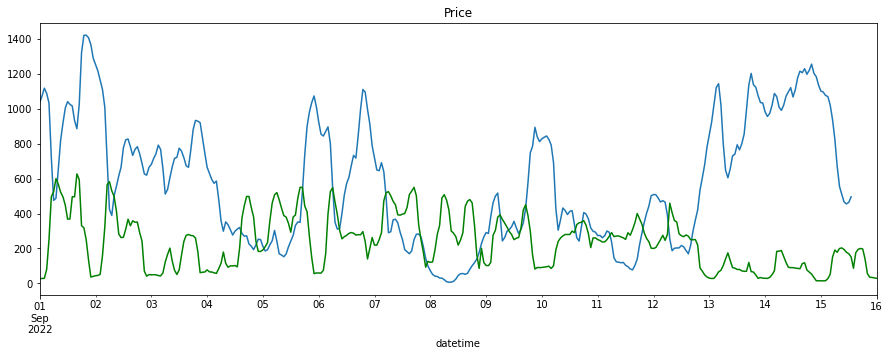

In [6]:
fig, ax = plt.subplots()

short_data = data['2022-09-01':]
#short_data.loc[:,'temperature'].plot(ax=ax, style='.', color='yellow', figsize=(15,5), title='Temperature')
#short_data.loc[:,'humidity'].apply(lambda w: w * 0.5 -30 ).plot(ax=ax, style='-', figsize=(15,5), title='Rain')
short_data.loc[:,'Wind_MWh'].apply(lambda w: w*0.5).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
#short_data.loc[:,'wind'].apply(lambda w: w*50).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
short_data.loc[:,'price'].plot(ax=ax, style='-', color='green', figsize=(15,5), title='Price')


# Short time look up - air temperature and electricity price

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

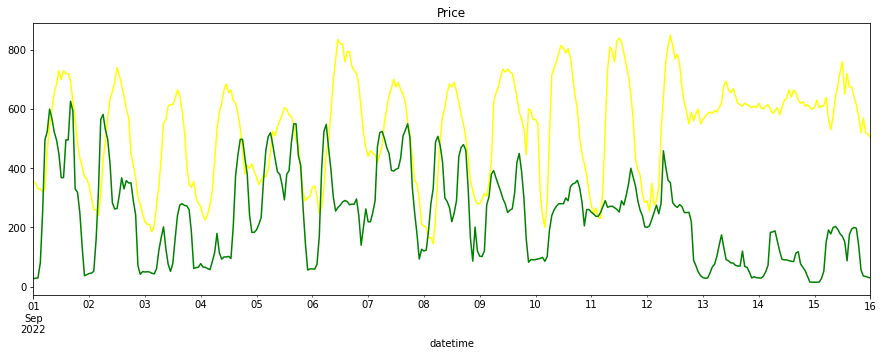

In [7]:
fig, ax = plt.subplots()


short_data = data['2022-09-01':]
short_data.loc[:,'temperature'].apply(lambda t: t*50).plot(ax=ax, style='-', color='yellow', figsize=(15,5), title='Temperature')
#short_data.loc[:,'humidity'].apply(lambda w: w * 0.5 -30 ).plot(ax=ax, style='-', figsize=(15,5), title='Rain')
#short_data.loc[:,'Wind_MWh'].apply(lambda w: w*0.5).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
#short_data.loc[:,'wind'].apply(lambda w: w*50).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
short_data.loc[:,'price'].plot(ax=ax, style='-', color='green', figsize=(15,5), title='Price')


# Long term look up - electricity price and temperature

It seems that there may be a correlation between air temperature and electricity price. Let's take a look for the long term data.

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

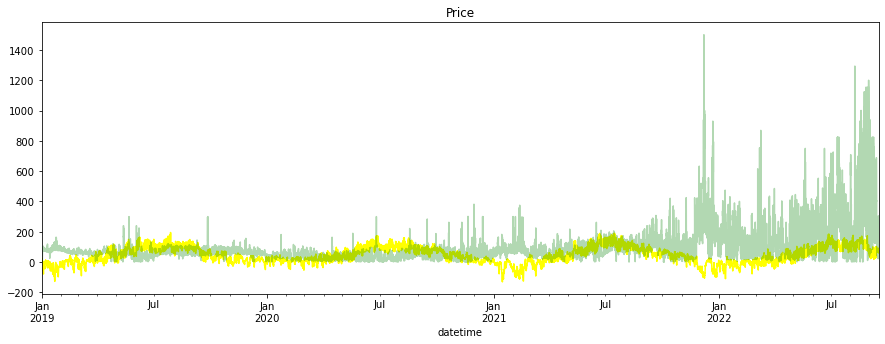

In [8]:
fig, ax = plt.subplots()

data.loc[:,'temperature'].apply(lambda t: t*6).plot(ax=ax, style='-', color='yellow', figsize=(15,5), title='Temperature')
data.loc[:,'price'].apply(lambda t: t*1.5).plot(ax=ax, style='-', alpha=0.3, color='green', figsize=(15,5), title='Price')

### Crisis affecting the data

You can see clearly that the world crisis are affecting to the price. Let's take a look for the long term data from 2019-2021, i.e. from more static state, to get to see the normal variance of the price and temperature.

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

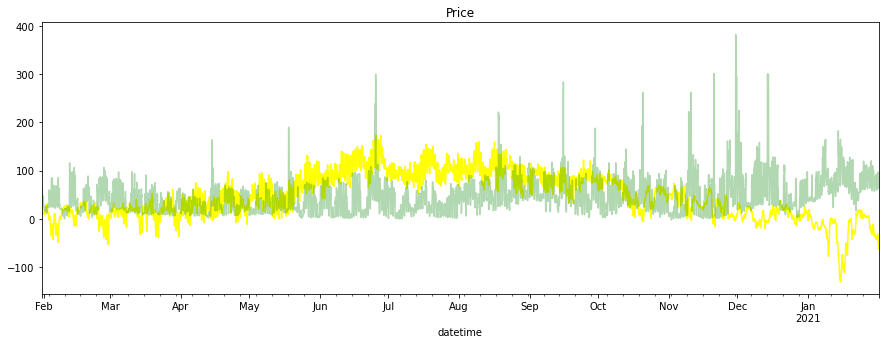

In [9]:
fig, ax = plt.subplots()


short_data = data['2020-01-31':'2021-01-31']

short_data.loc[:,'temperature'].apply(lambda t: t*6).plot(ax=ax, style='-', color='yellow', figsize=(15,5), title='Temperature')
short_data.loc[:,'price'].apply(lambda t: t*1.5).plot(ax=ax, style='-', alpha=0.3, color='green', figsize=(15,5), title='Price')

### Look up the seasonal variance of the price of electricity

There may be seasonal variance in the prices, so next we look up the data per month, per weekday and per day.

<AxesSubplot:xlabel='month', ylabel='price'>

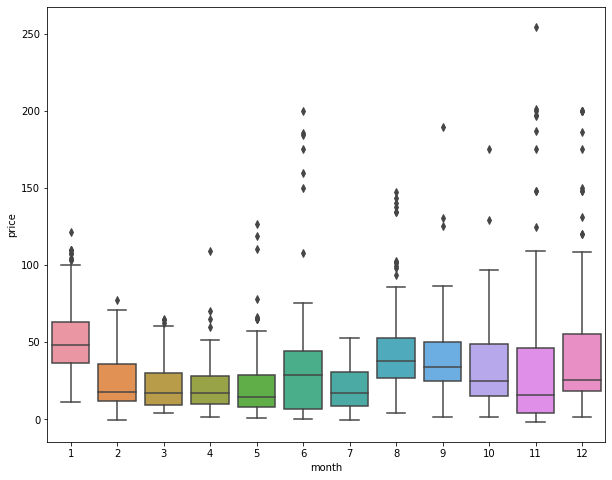

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=short_data, x='month', y='price')

<AxesSubplot:xlabel='weekday', ylabel='price'>

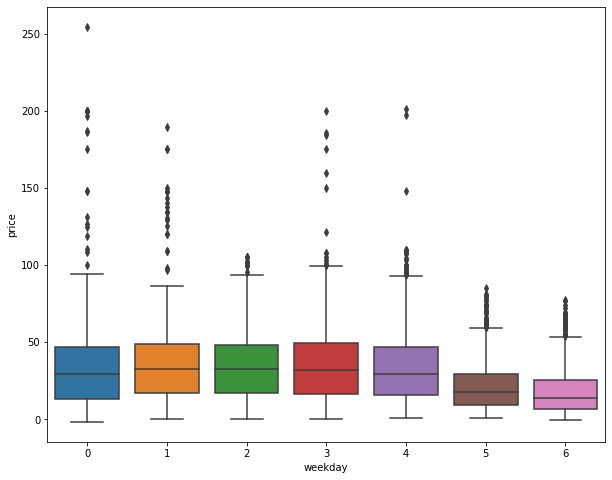

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=short_data, x='weekday', y='price')

<AxesSubplot:xlabel='hour', ylabel='price'>

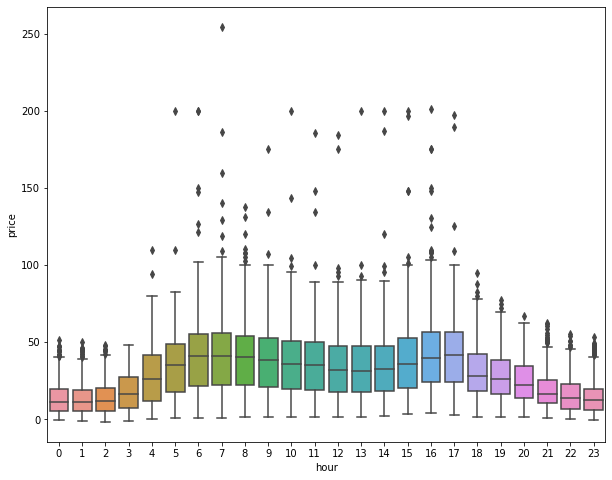

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=short_data, x='hour', y='price')

In [13]:
short_data.describe()

,year,month,day,pressure,rain,humidity,temperature,wind,hour,dh_MWh,Wind_MWh,price,weekday
count,8808.000000,8808.000000,8808.000000,8801.000000,8752.000000,8801.000000,8802.000000,8795.000000,8808.00000,8808.000000,8776.000000,8808.000000,8808.000000
mean,2020.084469,6.498638,15.798365,1011.298466,0.099977,78.006590,7.845376,4.685253,11.50000,751.025365,775.503418,30.047936,3.016349
std,0.278105,3.458689,8.835822,11.132685,0.484227,17.781565,7.879148,2.113628,6.92258,408.319002,544.063019,22.576108,2.001409
min,2020.000000,1.000000,1.000000,964.200000,0.000000,18.000000,-21.800000,0.000000,0.00000,178.832897,-3.000000,-1.730000,0.000000
25%,2020.000000,3.000000,8.000000,1004.600000,0.000000,67.000000,1.900000,3.250000,5.75000,340.786942,320.750000,12.837500,1.000000
50%,2020.000000,7.000000,16.000000,1012.300000,0.000000,84.000000,6.900000,4.400000,11.50000,766.767366,643.500000,25.840000,3.000000
75%,2020.000000,10.000000,23.000000,1019.200000,0.000000,92.000000,14.100000,5.800000,17.25000,1069.564502,1167.000000,44.042500,5.000000
max,2021.000000,12.000000,31.000000,1041.700000,16.800000,100.000000,28.900000,15.100000,23.00000,2422.537673,2188.000000,254.440000,6.000000


# XGBoost test with old data

Let's try how the XGBoost library works with our data. First we try with two variables, price and temperature. We split the data to the train and test sets, the test set to be about 3 months in the end of the time series.

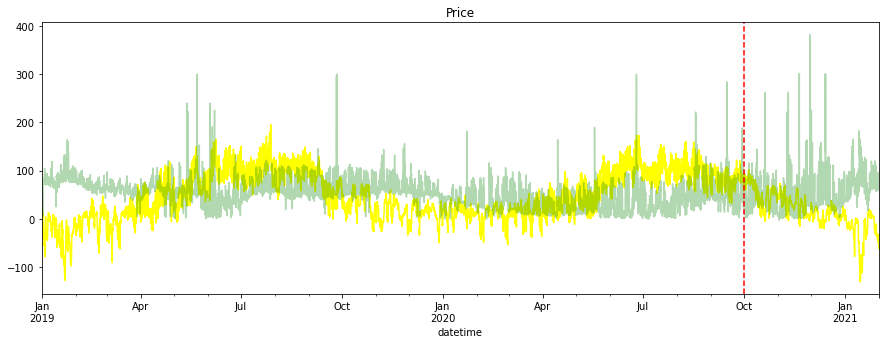

In [14]:
fig, ax = plt.subplots()

#select data before war crisis to get more static data set for testing
old_data = data['2019-01-01':'2021-01-31']
old_data.loc[:,'temperature'].apply(lambda t: t*6).plot(ax=ax, style='-', color='yellow', figsize=(15,5), title='Temperature')
old_data.loc[:,'price'].apply(lambda t: t*1.5).plot(ax=ax, style='-', alpha=0.3, color='green', figsize=(15,5), title='Price')

#split train and test data sets
old_train = old_data[:'2020-09-30']
old_test = old_data['2020-10-1':]

#draw the splitting line to the plot
ax.axvline('2020-10-01', color='red', ls='--')

In [15]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

old_train = old_train.copy()
old_test = old_test.copy()
features = ['hour', 'weekday', 'month', 'temperature']
target = 'price'

X_train = old_train[features]
y_train = old_train[target]
X_test = old_test[features]
y_test = old_test[target]

reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,)
reg.fit(X_train, y_train, 
        eval_set=[(X_train, y_train),(X_test, y_test)],
        verbose=True)


[12:29:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:29.93368	validation_1-rmse:34.81880
[1]	validation_0-rmse:22.93147	validation_1-rmse:28.40148
[2]	validation_0-rmse:18.46078	validation_1-rmse:25.23203
[3]	validation_0-rmse:15.71382	validation_1-rmse:23.62071
[4]	validation_0-rmse:14.08433	validation_1-rmse:23.15561
[5]	validation_0-rmse:13.16055	validation_1-rmse:23.06838
[6]	validation_0-rmse:12.53299	validation_1-rmse:23.10788
[7]	validation_0-rmse:12.18063	validation_1-rmse:23.25396
[8]	validation_0-rmse:11.96682	validation_1-rmse:23.27196
[9]	validation_0-rmse:11.84121	validation_

/home/sakorpi/.conda/envs/conda-gis/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/sakorpi/.conda/envs/conda-gis/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-rmse:11.17362	validation_1-rmse:23.54813
[19]	validation_0-rmse:11.15509	validation_1-rmse:23.56278
[20]	validation_0-rmse:11.12134	validation_1-rmse:23.57214
[21]	validation_0-rmse:11.05850	validation_1-rmse:23.58307
[22]	validation_0-rmse:11.00193	validation_1-rmse:23.59681
[23]	validation_0-rmse:10.97666	validation_1-rmse:23.55796
[24]	validation_0-rmse:10.96330	validation_1-rmse:23.56226
[25]	validation_0-rmse:10.92313	validation_1-rmse:23.59524
[26]	validation_0-rmse:10.88355	validation_1-rmse:23.57927
[27]	validation_0-rmse:10.82723	validation_1-rmse:23.55508
[28]	validation_0-rmse:10.81815	validation_1-rmse:23.52946
[29]	validation_0-rmse:10.80604	validation_1-rmse:23.53210
[30]	validation_0-rmse:10.76602	validation_1-rmse:23.52323
[31]	validation_0-rmse:10.75933	validation_1-rmse:23.53035
[32]	validation_0-rmse:10.72110	validation_1-rmse:23.50937
[33]	validation_0-rmse:10.69957	validation_1-rmse:23.50577
[34]	validation_0-rmse:10.66355	validation_1-rmse:23.486

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

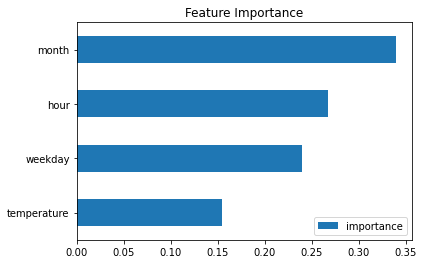

In [16]:


fi = pd.DataFrame(data=reg.feature_importances_,
             index=features,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()



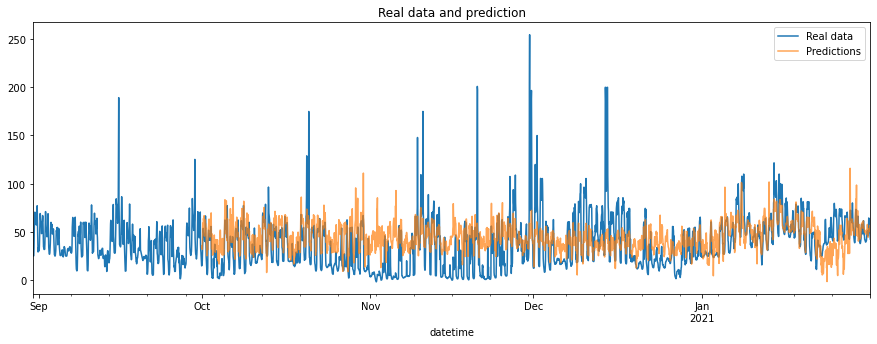

In [17]:
results = old_data.copy()
old_test['prediction'] = reg.predict(X_test)
results = results.merge(old_test[['prediction']], how='left', left_index=True, right_index=True).loc['2020-08-31':]
ax = results[['price']].plot(figsize=(15, 5))
results['prediction'].plot(ax=ax, style='-', alpha=0.7)
plt.legend(['Real data', 'Predictions'])
ax.set_title('Real data and prediction')
plt.show()

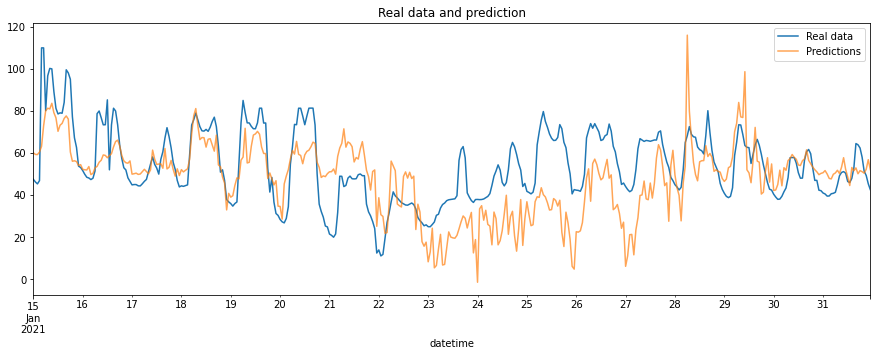

In [18]:
# plot short time results
short_res = results['2021-01-15':]
ax = short_res[['price']].plot(figsize=(15, 5))
short_res['prediction'].plot(ax=ax, style='-', alpha=0.7)
plt.legend(['Real data', 'Predictions'])
ax.set_title('Real data and prediction')
plt.show()

#### Results of first learning test

With this model feature 'month' is used the most to predict the price. The RMSE value is also telling us that the models is overfitting a bit. The results looks like the prediction is a bit higher than the actual price.

Let's try to learn another model. This time we use more features and try not to overfit the model.

In [19]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

old_train2 = old_train.copy()
old_test2 = old_test.copy()
features2 = ['hour', 'weekday', 'month', 'temperature', 'pressure', 'rain', 'humidity', 'dh_MWh', 'Wind_MWh']
target = 'price'

X_train2 = old_train2[features2]
y_train2 = old_train2[target]
X_test2 = old_test2[features2]
y_test2 = old_test2[target]

#add max_depth and learning_rate to not overfit the model

reg2 = xgb.XGBRegressor(n_estimators=1000, max_depth=4, early_stopping_rounds=50, learning_rate=0.02)
reg2.fit(X_train2, y_train2, 
        eval_set=[(X_train2, y_train2),(X_test2, y_test2)],
        verbose=True)

[12:29:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:39.84336	validation_1-rmse:45.07659
[1]	validation_0-rmse:39.15369	validation_1-rmse:44.38296
[2]	validation_0-rmse:38.47961	validation_1-rmse:43.71078
[3]	validation_0-rmse:37.81802	validation_1-rmse:43.03083
[4]	validation_0-rmse:37.17356	validation_1-rmse:42.38880
[5]	validation_0-rmse:36.54383	validation_1-rmse:41.77545
[6]	validation_0-rmse:35.92824	validation_1-rmse:41.16576
[7]	validation_0-rmse:35.32744	validation_1-rmse:40.59028
[8]	validation_0-rmse:34.73996	validation_1-rmse:40.01277
[9]	validation_0-rmse:34.16093	validation_

/home/sakorpi/.conda/envs/conda-gis/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-rmse:29.53705	validation_1-rmse:34.91953
[19]	validation_0-rmse:29.07559	validation_1-rmse:34.43499
[20]	validation_0-rmse:28.62568	validation_1-rmse:34.00849
[21]	validation_0-rmse:28.19042	validation_1-rmse:33.60497
[22]	validation_0-rmse:27.76886	validation_1-rmse:33.23533
[23]	validation_0-rmse:27.35552	validation_1-rmse:32.85741
[24]	validation_0-rmse:26.95315	validation_1-rmse:32.51700
[25]	validation_0-rmse:26.55197	validation_1-rmse:32.10951
[26]	validation_0-rmse:26.16054	validation_1-rmse:31.71246
[27]	validation_0-rmse:25.77948	validation_1-rmse:31.36872
[28]	validation_0-rmse:25.41123	validation_1-rmse:31.04297
[29]	validation_0-rmse:25.05564	validation_1-rmse:30.74528
[30]	validation_0-rmse:24.70525	validation_1-rmse:30.40586
[31]	validation_0-rmse:24.36746	validation_1-rmse:30.12600
[32]	validation_0-rmse:24.03405	validation_1-rmse:29.81070
[33]	validation_0-rmse:23.70487	validation_1-rmse:29.52844
[34]	validation_0-rmse:23.38994	validation_1-rmse:29.275

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.02, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

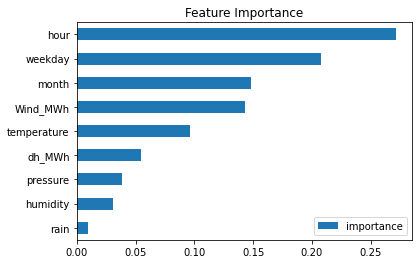

In [20]:


fi2 = pd.DataFrame(data=reg2.feature_importances_,
             index=features2,
             columns=['importance'])
fi2.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()


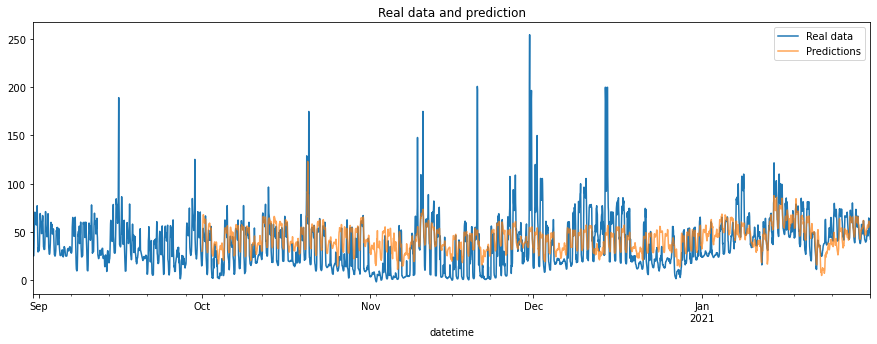

In [25]:
# Predict from the model
results2 = old_data.copy()
old_test2['prediction'] = reg2.predict(X_test2)
results2 = results2.merge(old_test2[['prediction']], how='left', left_index=True, right_index=True).loc['2020-08-31':]

# plot results
ax = results2[['price']].plot(figsize=(15, 5))
results2['prediction'].plot(ax=ax, style='-', alpha=0.7)
plt.legend(['Real data', 'Predictions'])
ax.set_title('Real data and prediction')
plt.show()

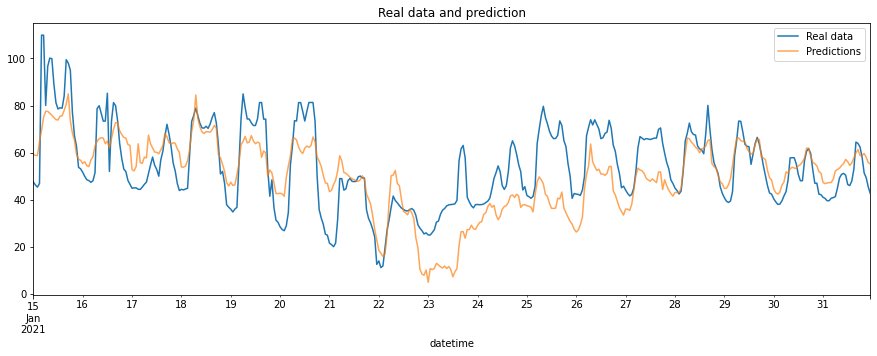

In [26]:
# plot short time results
short_res2 = results2['2021-01-15':]
ax = short_res2[['price']].plot(figsize=(15, 5))
short_res2['prediction'].plot(ax=ax, style='-', alpha=0.7)
plt.legend(['Real data', 'Predictions'])
ax.set_title('Real data and prediction')
plt.show()

In [23]:
#calculate abosulte value of the difference to see the biggest and smallest differencies

results2['abs_error'] = abs(results2['price']-results2['prediction'])

results2.nlargest(10, 'abs_error', keep='first')

,year,month,day,pressure,rain,humidity,temperature,wind,hour,dh_MWh,Wind_MWh,price,weekday,prediction,abs_error
datetime,,,,,,,,,,,,,,,
2020-11-30 07:00:00,2020,11,30,1020.1,0.1,96.0,0.1,3.5,7,1284.303165,1019.0,254.44,0,56.703480,197.736520
2020-12-14 05:00:00,2020,12,14,1019.5,0.0,78.0,-1.3,1.9,5,1336.030185,112.0,199.96,0,43.232567,156.727433
2020-12-14 06:00:00,2020,12,14,1019.7,0.0,77.0,-1.1,2.1,6,1358.241423,126.0,199.93,0,49.017941,150.912059
2020-12-14 14:00:00,2020,12,14,1019.8,0.0,83.0,-0.9,3.3,14,1343.636010,188.0,199.97,0,51.354134,148.615866
2020-12-14 15:00:00,2020,12,14,1019.8,0.0,85.0,-0.9,1.3,15,1319.858743,203.0,199.91,0,52.103241,147.806759
2020-12-14 13:00:00,2020,12,14,1019.9,0.0,82.0,-0.9,2.2,13,1332.721562,163.0,199.94,0,52.655075,147.284925
2020-11-20 17:00:00,2020,11,20,1013.6,0.0,92.0,0.7,5.8,17,1193.207968,1376.0,197.40,4,51.301159,146.098841
2020-11-20 16:00:00,2020,11,20,1012.4,0.0,91.0,1.2,4.9,16,1184.231450,1599.0,200.89,4,56.701225,144.188775
2020-11-30 06:00:00,2020,11,30,1020.4,0.1,96.0,0.0,3.6,6,1273.367900,1031.0,200.06,0,59.142063,140.917937


In [24]:
results2.nsmallest(10, 'abs_error', keep='first')

,year,month,day,pressure,rain,humidity,temperature,wind,hour,dh_MWh,Wind_MWh,price,weekday,prediction,abs_error
datetime,,,,,,,,,,,,,,,
2021-01-15 06:00:00,2021,1,15,1021.2,0.0,77.0,-21.7,4.1,6,2357.868402,278.0,80.04,4,80.034470,0.005530
2020-11-20 21:00:00,2020,11,20,1018.1,0.0,94.0,-0.1,6.1,21,1098.514929,579.0,36.60,4,36.585644,0.014356
2020-10-12 14:00:00,2020,10,12,1011.4,0.0,74.0,11.5,6.6,14,1388.639830,141.0,55.46,0,55.480434,0.020434
2020-12-04 11:00:00,2020,12,4,1016.8,0.5,94.0,0.3,9.4,11,947.119021,1060.0,39.74,4,39.706730,0.033270
2020-10-17 08:00:00,2020,10,17,1015.9,0.0,75.0,7.3,4.6,8,789.884653,996.0,20.58,5,20.626389,0.046389
2020-10-17 22:00:00,2020,10,17,1002.2,0.0,87.0,8.5,4.9,22,652.047175,470.0,16.68,5,16.732590,0.052590
2020-10-10 12:00:00,2020,10,10,1016.6,0.0,79.0,13.5,6.5,12,462.343168,623.0,23.65,5,23.708361,0.058361
2020-10-03 09:00:00,2020,10,3,1022.4,0.0,84.0,13.5,7.3,9,1115.246666,707.0,37.28,5,37.215168,0.064832
2020-10-21 08:00:00,2020,10,21,1011.0,0.0,83.0,6.8,6.7,8,897.488713,810.0,53.16,2,53.085247,0.074753


#### Results of the second learning test

This model seems to work better. It takes more account the short term changes in the price, like daily and weekly variations. The prediction results are also closer to the real data than in the first test. Also the cold season in december 2021 is not noticed in either test prediction. That is maybe because the winter 2020 was very warm and from 2019 december we don't have any data.

Next we try to look at how predictions will success with the wild changes in the wlwctricity prices we have been witnessing in 2022.